<a href="https://colab.research.google.com/github/liudmylasovetovs/goit-algo-hw-04/blob/main/%D0%94%D0%974_%D0%A1%D0%BE%D0%B2%D1%94%D1%82%D0%BE%D0%B2%D1%81_%D0%9B%D1%8E%D0%B4%D0%BC%D0%B8%D0%BB%D0%B0_%D0%92%D0%BE%D0%BB%D0%BE%D0%B4%D0%B8%D0%BC%D0%B8%D1%80%D1%96%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Опис домашнього завдання**
Python має дві вбудовані функції сортування: sorted і sort. Функції сортування Python використовують Timsort — гібридний алгоритм сортування, що поєднує в собі сортування злиттям і сортування вставками.

Порівняйте три алгоритми сортування: злиттям, вставками та Timsort за часом виконання. Аналіз повинен бути підтверджений емпіричними даними, отриманими шляхом тестування алгоритмів на різних наборах даних. Емпірично перевірте теоретичні оцінки складності алгоритмів, наприклад, сортуванням на великих масивах. Для заміру часу виконання алгоритмів використовуйте модуль [timeit](https://docs.python.org/uk/3/library/timeit.html).

Покажіть, що поєднання сортування злиттям і сортування вставками робить алгоритм Timsort набагато ефективнішим, і саме з цієї причини програмісти, в більшості випадків, використовують вбудовані в Python алгоритми, а не кодують самі. Зробіть висновки.

In [61]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np

In [62]:
def tim_sort(arr):
    arr.sort()

In [71]:
def tim_sorted(arr):
    sorted(arr)

In [72]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        key = lst[i]
        j = i-1
        while j >=0 and key < lst[j] :
                lst[j+1] = lst[j]
                j -= 1
        lst[j+1] = key
    return lst

In [73]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    return merge(merge_sort(left_half), merge_sort(right_half))

In [74]:
def merge(left, right):
    merged = []
    left_index = 0
    right_index = 0

    # Спочатку об'єднайте менші елементи
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1

    # Якщо в лівій або правій половині залишилися елементи,додайте їх до результату
    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1

    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1

    return merged

In [75]:
# Генеруємо тестові дані
data = {
    "Small": [random.randint(0, 100) for _ in range(100)],
    "Medium": [random.randint(0, 1000) for _ in range(1000)],
    "Large": [random.randint(0, 10000) for _ in range(10000)]
}

In [76]:
# Створюємо списки для часових значень для кожного алгоритму
merge_sort_times = []
insertion_sort_times = []
tim_sort_times = []
tim_sorted_times = []

In [77]:
# Вимірюємо час виконання для кожного алгоритму на кожному наборі даних
for name, data_set in data.items():
    print(f"Data Set: {name}")

    # Сортування злиттям
    merge_sort_time = timeit.timeit(lambda: merge_sort(data_set.copy()), number=1)
    merge_sort_times.append(merge_sort_time)
    print(f"Merge Sort Time: {merge_sort_time}")

    # Сортування вставками
    insertion_sort_time = timeit.timeit(lambda: insertion_sort(data_set.copy()), number=1)
    insertion_sort_times.append(insertion_sort_time)
    print(f"Insertion Sort Time: {insertion_sort_time}")

    # Timsort
    tim_sort_time = timeit.timeit(lambda: tim_sort(data_set.copy()), number=1)
    tim_sort_times.append(tim_sort_time)
    print(f"Timsort Time: {tim_sort_time}")

    # Timsorted
    tim_sorted_time = timeit.timeit(lambda: tim_sorted(data_set.copy()), number=1)
    tim_sorted_times.append(tim_sorted_time)
    print(f"Timsorted Time: {tim_sorted_time}")
    print()


Data Set: Small
Merge Sort Time: 0.0005611810001937556
Insertion Sort Time: 0.0009482880000177829
Timsort Time: 1.9176000023435336e-05
Timsorted Time: 1.5403999896079767e-05

Data Set: Medium
Merge Sort Time: 0.004174380999756977
Insertion Sort Time: 0.04571697600022162
Timsort Time: 0.00015300999984901864
Timsorted Time: 0.00013651499966726988

Data Set: Large
Merge Sort Time: 0.04819657500001995
Insertion Sort Time: 4.678152949000378
Timsort Time: 0.00178571100013869
Timsorted Time: 0.0017821629999161814



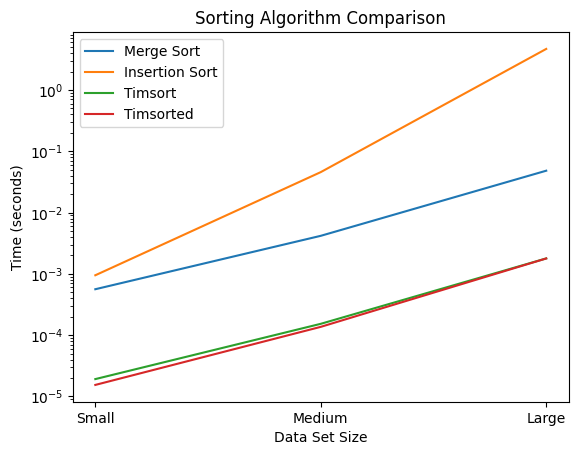

In [78]:
# Побудова графіків з логарифмічним масштабом на вісі ординат
labels = list(data.keys())
x = range(len(labels))

plt.semilogy(x, merge_sort_times, label='Merge Sort')
plt.semilogy(x, insertion_sort_times, label='Insertion Sort')
plt.semilogy(x, tim_sort_times, label='Timsort')
plt.semilogy(x, tim_sorted_times, label='Timsorted')

plt.xlabel('Data Set Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()